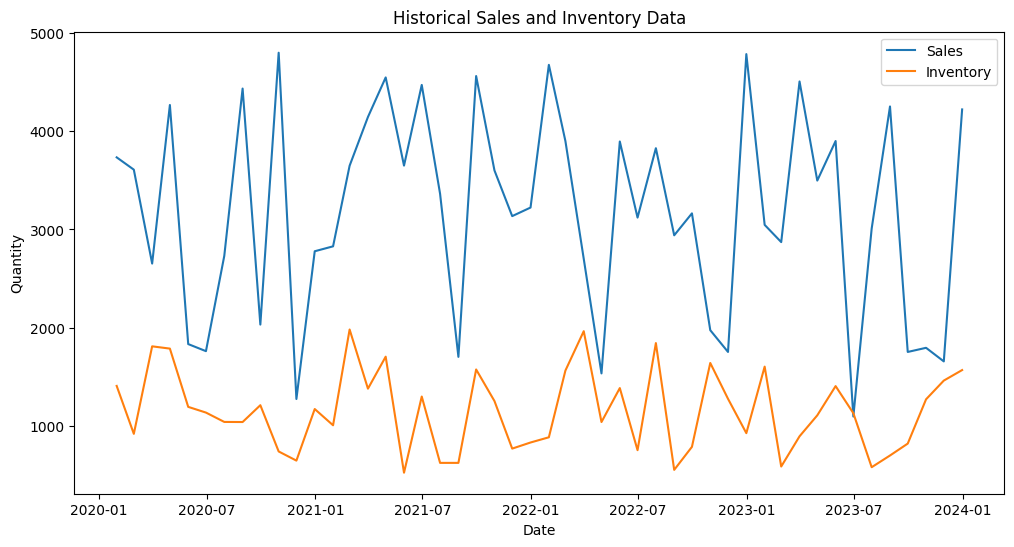

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Mean Absolute Error (MAE): 1156.8075089085257
Mean Squared Error (MSE): 1477926.6019556206
Root Mean Squared Error (RMSE): 1215.7000460457425


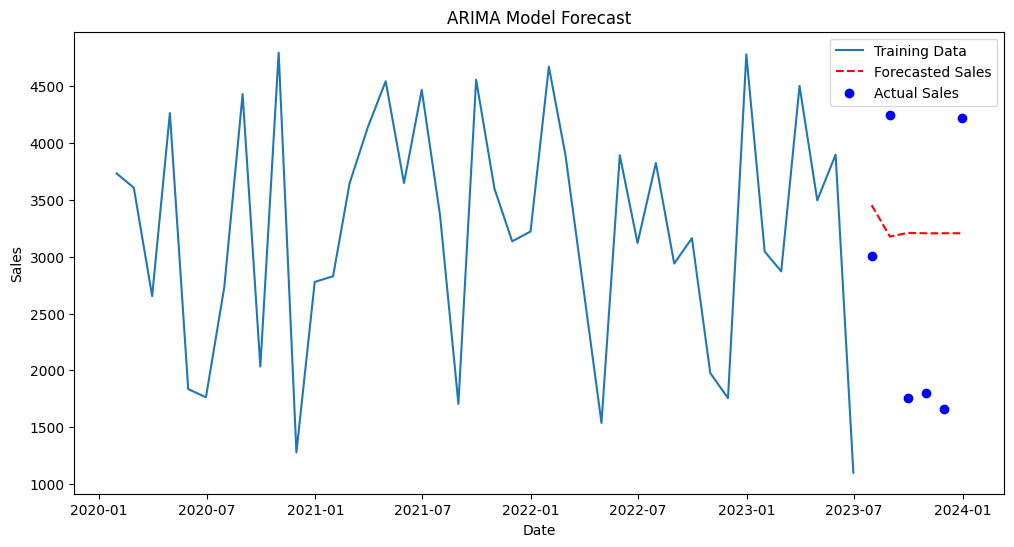

In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 1: Generate synthetic supply chain data
np.random.seed(0)
dates = pd.date_range(start='2020-01-01', end='2023-12-31', freq='M')
sales = np.random.randint(1000, 5000, size=len(dates))
inventory = np.random.randint(500, 2000, size=len(dates))
data = {'Date': dates, 'Sales': sales, 'Inventory': inventory}
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Step 2: Data Analysis and Exploration
plt.figure(figsize=(12, 6))
plt.plot(df['Sales'], label='Sales')
plt.plot(df['Inventory'], label='Inventory')
plt.title('Historical Sales and Inventory Data')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

# Step 3: ARIMA Model Development
# Splitting data into train and test sets
train_data = df['Sales'][:'2023-06-30']
test_data = df['Sales']['2023-07-01':]

# ARIMA Model
model = ARIMA(train_data, order=(1, 1, 1))
results = model.fit()

# Step 4: Model Evaluation
forecast = results.forecast(steps=len(test_data))
forecast_index = pd.date_range(start='2023-07-01', periods=len(test_data), freq='M')

# Calculate evaluation metrics
mae = mean_absolute_error(test_data, forecast)
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Step 5: Supply Chain Optimization (Not implemented in this code snippet)

# Step 6: Visualization and Conclusion
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data.index, forecast, label='Forecasted Sales', linestyle='--', color='red')
plt.scatter(test_data.index, test_data, label='Actual Sales', color='blue')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
